In [1]:
pwd

'/System/Volumes/Data/srv/zatserkl/work/JupyterWork/NNFit'

x.shape: (1, 21)
y.shape: (1, 21)
e.shape: (1, 21)


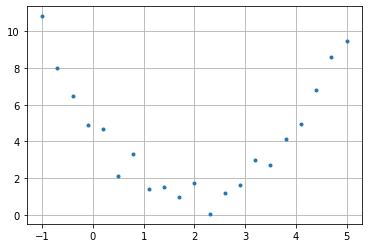

In [35]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 5, 20+1).reshape(1, -1)
print(f'x.shape: {x.shape}')

a, b, c = 1, -4, 5

y = a*x**2 + b*x + c
print(f'y.shape: {y.shape}')

# errors

np.random.seed(1)

mu = 0
sigma = 0.5

# e = np.random.normal(mu, sigma, x.shape[1])
e = mu + sigma * np.random.randn(*x.shape)  # better(?)
print(f'e.shape: {e.shape}')

y = y + e

plt.figure()
plt.plot(x[0], y[0], '.')
plt.grid()

e.shape: (1, 21)


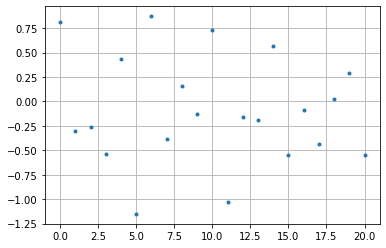

In [30]:
np.random.seed(1)

mu = 0
sigma = 0.5

# e = mu + sigma * np.random.randn(1, x.shape[1])
e = mu + sigma * np.random.randn(*x.shape)
print(f'e.shape: {e.shape}')

plt.figure()
plt.plot(e[0], '.')
plt.grid()


In [34]:
np.random.seed(1)
print(np.random.normal(0, 1, 5))
np.random.seed(1)
print(np.random.randn(5))

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
    
def load_parabola_dataset():
    x = np.linspace(-1, 5, 20+1).reshape(1, -1)
    print(f'x.shape: {x.shape}')

    a, b, c = 1, -4, 5

    y = a*x**2 + b*x + c
    print(f'y.shape: {y.shape}')

    # errors

    np.random.seed(1)

    mu = 0
    sigma = 0.5

    # e = np.random.normal(mu, sigma, x.shape[1])
    e = mu + sigma * np.random.randn(*x.shape)  # better(?)
    print(f'e.shape: {e.shape}')

    y = y + e

    return x, y

# Line dataset

X.shape: (1, 21), Y.shape: (1, 21)


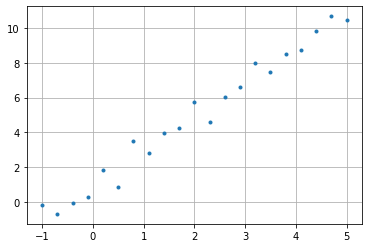

In [1]:
import numpy as np
import matplotlib.pyplot as plt
    
def load_line_dataset():
    x = np.linspace(-1, 5, 20+1).reshape(1, -1)
    # print(f'x.shape: {x.shape}')

    a, b = 2, 1

    y = a*x + b
    # print(f'y.shape: {y.shape}')

    # errors

    np.random.seed(1)

    mu = 0
    sigma = 0.5

    # e = np.random.normal(mu, sigma, x.shape[1])
    e = mu + sigma * np.random.randn(*x.shape)  # better(?)
    # print(f'e.shape: {e.shape}')

    y = y + e

    return x, y

X, Y = load_line_dataset()
print(f'X.shape: {X.shape}, Y.shape: {Y.shape}')

plt.figure()
plt.plot(X[0], Y[0], '.')
plt.grid()

In [2]:
def layer_sizes(X, Y):
    # AZ: I am not sure I really need this funciton
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    ### n_h = 0  # ---------------------------------> hardcoded for no-hidden layer example
    n_h = 1  # ---------------------------------> hardcoded for no-hidden layer example
    n_y = Y.shape[0] # size of output layer ----> this is not m
    ### END CODE HERE ###

    return (n_x, n_h, n_y)

print(layer_sizes(X, Y))

(1, 1, 1)


In [3]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01  # for our net this is just one number
    b1 = np.zeros((n_h, 1))
    # W2 = np.random.randn(n_y, n_h) * 0.01
    W2 = np.ones((n_y, n_h))
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    print(f'initialize_parameters: W1: {W1}, b1: {b1}, W2: {W2}, b2: {b2}')
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2
                  }
    
    return parameters

In [4]:
w1 = np.random.randn(1, 1) * 0.01
b1 = np.zeros((1, 1))
print(f'w1:\n{w1}\nb1:{b1}')


w1:
[[0.01144724]]
b1:[[0.]]


In [17]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    # A2 -- The sigmoid output of the second activation
    # cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    A1 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###

    # print(f'forward_proparation: W1: {W1}, b1: {b1}, W2: {W2}, b2: {b2}')
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    # print(f'forward_propagation: W1.shape: {W1.shape}, b1.shape: {b1.shape}, X.shape: {X.shape}, Z1.shape: {Z1.shape}')
    ### A1 = np.tanh(Z1)
    A1 = Z1  # AZ: identity activation function in our case
    Z2 = np.dot(W2, A1) + b2
    # A2 = sigmoid(Z2)
    A2 = Z2
    ### END CODE HERE ###
    
    # print(f'    forward_propagation: A1: {A1}')
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2
             }
    
    return A1, cache

In [18]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13) -- In case of our fit it's average sum of squares
    
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### ### START CODE HERE ### (≈ 2 lines of code)
    ### logprobs = -1/m * (np.dot(Y, np.log(A2).T) + np.dot(1 - Y, np.log(1 - A2).T))
    ### cost = np.squeeze(logprobs)
    ### ### END CODE HERE ###

    cost = 1/m * np.sum((A2 - Y)**2)
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [19]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # print(f'X.shape: {X.shape}')
    # print(f'Y.shape: {Y.shape}')
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters['W1']
    W2 = parameters['W2']
    ### END CODE HERE ###
    # print(f'W1:\n{W1}')
    # print(f'W2:\n{W2}')
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache['A1']
    A2 = cache['A2']
    ### END CODE HERE ###
    # print(f'A1:\n{A1}')
    # print(f'A2:\n{A2}')
    
    # # Backward propagation: calculate dW1, db1, dW2, db2. 
    # ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    # dZ2 = A2 - Y
    # # print(f'dZ2.shape: {dZ2.shape}')
    # dW2 = 1/m * np.dot(dZ2, A1.T)
    # # print(f'dW2.shape: {dW2.shape}')
    # db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    # # print(f'db2.shape: {db2.shape}')
    # # print(f'(dZ2*(1 - A1*A1)).shape: {(dZ2*(1 - A1*A1)).shape}')
    # dZ1 = np.dot(W2.T, dZ2) * (1 - A1*A1)  # NB: np.dot(W2.T, dZ2): (4, 1)*(1, 3)
    # # print(f'dZ1.shape: {dZ1.shape}')
    # dW1 = 1/m * np.dot(dZ1, X.T)
    # # print(f'dW1.shape: {dW1.shape}')
    # db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    # # print(f'db1.shape: {db1.shape}')
    # ### END CODE HERE ###

    dA2 = 2 * (A2 - Y) / m
    dZ2 = dA2
    dW2 = np.zeros(W2.shape)
    db2 = np.zeros((1, 1))

    dZ1 = dZ2
    # dW1 = 1/m * np.sum(np.dot(dZ1, X.T))
    dW1 = 1/m * np.dot(dA2, X.T)
    # db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    db1 = 1/m * np.sum(dZ1)  # ???

    # print(f'backward_propagation: dA2.shape: {dA2.shape}')
    # print(f'backward_propagation: dZ1.shape: {dZ1.shape}')
    # print(f'backward_propagation: dW1.shape: {dW1.shape}')
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2
             }
    
    return grads

In [20]:
v = np.array([1, 2, 3]).reshape(-1, 1)
print(f'v:\n{v}')
print(f'np.dot(v.T, v): {np.dot(v.T, v)}')
print(f'np.sum(np.dot(v.T, v)): {np.sum(np.dot(v.T, v))}')

v:
[[1]
 [2]
 [3]]
np.dot(v.T, v): [[14]]
np.sum(np.dot(v.T, v)): 14


In [22]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    ## END CODE HERE ###

    # print(f'.. update_parameters: parameters:\n{parameters}')
    # print(f'.. update_parameters: grads:\n{grads}')
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2
                  }
    
    return parameters

In [31]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)

    # print(f'parameters:\n{parameters}')
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    cost_array = []

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        # print(f'  A2: {A2}')
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)

        cost_array.append(cost)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        # print(f'-- before update_parameters:\n{parameters}')
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        # print(f'-- after update_parameters:\n{parameters}')
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 2 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    plt.figure()
    plt.plot(cost_array, '.')
    plt.yscale('log')
    plt.grid()

    return parameters

initialize_parameters: W1: [[-0.00416758]], b1: [[0.]], W2: [[1.]], b2: [[0.]]
Cost after iteration 0: 37.311480
Cost after iteration 2: 0.350192
Cost after iteration 4: 0.337417
Cost after iteration 6: 0.329867
Cost after iteration 8: 0.323663

parameters["W1"]:
[[2.03327511]]
parameters["b1"]: [[0.7484184]]


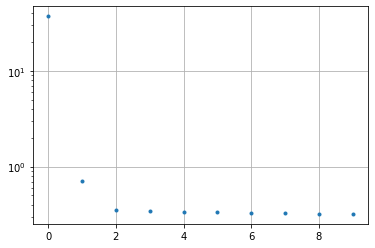

In [32]:
X, Y = load_line_dataset()

# Build a model with a n_h-dimensional hidden layer
num_iterations = 10
parameters = nn_model(X, Y, n_h=1, num_iterations=num_iterations, print_cost=True)

print(f'\nparameters["W1"]:\n{parameters["W1"]}\nparameters["b1"]: {parameters["b1"]}')

# Create a class

In [ ]:
class NNFit:
    def __init__(self, n_h):
        self.n_h = n_h
    
